# Table of Contents
 <p><div class="lev1 toc-item"><a href="#課題解答例" data-toc-modified-id="課題解答例-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>課題解答例</a></div><div class="lev2 toc-item"><a href="#Gaussian(正規分布)へのフィット" data-toc-modified-id="Gaussian(正規分布)へのフィット-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Gaussian(正規分布)へのフィット</a></div>

# 課題解答例

##  Gaussian(正規分布)へのフィット

正規分布で知られる，ガウス関数
$$
f(x)= \frac{1}{\sqrt{2\pi\sigma}}
\exp \left(\frac{- (x-\mu)^2}{2\sigma^2} \right)
$$
フィットをやってみましょう．

例えば，平均値($\mu$)が60点，偏差値($\sigma$)が15点として，ピークの人数が20人としましょう．

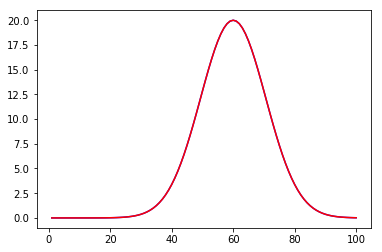

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def func(x, a1, a2, a3):
    return a1*np.exp(-(x-a2)**2/a3**2)

ndata = 100
xdata = np.linspace(1, ndata, ndata)
y = func(xdata, 20, 60, 15)
ydata = y
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')
plt.show()

In [17]:
from pprint import pprint
import scipy.linalg as linalg

def dfda1(x,a1,a2,a3):
    return np.exp(-(x - a2) ** 2 / a3 ** 2 / 2)
def dfda2(x,a1,a2,a3):
    return  a1 * (x - a2) / a3 ** 2 * np.exp(-(x - a2) ** 2 / a3 ** 2 / 2)
def dfda3(x,a1,a2,a3):
    return a1 * (x - a2) ** 2 / a3 ** 3 * np.exp(-(x - a2) ** 2 / a3 ** 2 / 2)

In [18]:
nparam = 3
guess1 = [10,50,10]

array([ 19.866,  59.841,  14.878])


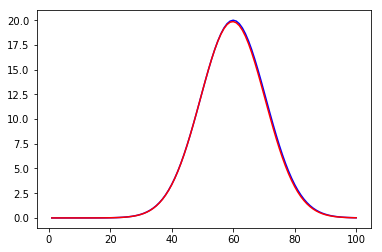

In [24]:
df=np.zeros([ndata])
for i in range(0,ndata):
    dy = ydata[i]-func(xdata[i], *guess1)
    df[i]=dy
#pprint(df)
Jac=np.zeros([ndata,nparam])
for i in range(0,ndata):
    Jac[i,0] = dfda1(xdata[i], *guess1)
    Jac[i,1] = dfda2(xdata[i], *guess1)
    Jac[i,2] = dfda3(xdata[i], *guess1)
# pprint(Jac)
iJac = linalg.inv(np.dot(np.transpose(Jac),Jac))
# print(iJac)
Jdf = np.dot(np.transpose(Jac),df)
# pprint(Jdf)
guess1 = guess1 + np.dot(iJac, Jdf)
pprint(guess1)
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *guess1), 'r-', label='fit')
plt.show()